# **Project 2**, APS1070 Fall 2021
**Anomaly Detection Algorithm using Gaussian Mixture Model [13 Marks]**


**Liyan Liu**


##**Part 1: Getting started [1.5 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? **284807 rows**  
* What features in the dataset are present aside from the 28 main features?  **Time, Amount and Class** 
* Which column contains the targets? **The column called "Class" contains the targets**
* To what do the target values correspond? **The target values correspond to whether each transaction is fraud or not. For class=0, it means fraudulence, and for class=1, it means non-fraudulence.**

In [ ]:
pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=a6ae6a116ea29da443431bee3316908c96fa93b38dd379349129669bcccd9cd8
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [ ]:
df.shape

(284807, 31)


* What is the percentage of entries in the dataset for each class? **Percentage of fraud(class=1) is 0.17%; Percentage of non-fraud(class=0)is 99.83%.**
* Is this data considered balanced or unbalanced? Why is this the case?**The data is unbalanced because the percentage of fraud clss is only 0.17% whereas the percentage of non-fraud class is 99.83%.**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? **Balance/imbalance is very important because it will impact our accuracy of predictions. In KNN classifier, an object is classified by a vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors. If the data is imbalance, like in our case, there's a large probability that the non-fraud class  would be a majority vote when we do the classificaiton. This means that the object would be more likely to be classified as non-fraud transaction, and the "false negative" problems would happened.**



In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
percent_f=(492/284807)*100
percent_nf=(284315/284807)*100
print(percent_f)
print(percent_nf)

0.1727485630620034
99.82725143693798


Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [ ]:
### Split the data  ###
X=df.drop(columns=['Class'])
y=df['Class']
#first split the data into 70% training and 30% test
X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.3, random_state=0)
#Next split the test set above by half, 30%*50%=15% validation set and 30%*50%=15% test set
X_val, X_test, y_val, y_test= train_test_split(X_test1, y_test1, test_size=0.5, random_state=0)

In [ ]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
282621,171027.0,-0.089443,0.357782,0.372505,-0.801467,1.162846,0.188938,0.890910,-0.168039,0.118459,-0.453604,0.090305,0.693211,0.154100,-0.112006,-1.241542,-0.601049,-0.550208,0.431785,1.151835,0.098474,0.176978,0.852738,-0.299085,0.270132,-0.228831,0.129662,-0.004395,-0.043638,17.95
64347,51117.0,-0.689366,1.052176,0.552481,-0.242164,0.134531,-0.175879,0.719387,0.406815,-1.074409,-0.598376,0.445441,0.687646,0.331740,0.749138,-0.103849,0.629374,-0.728605,0.113581,0.817667,0.022536,-0.292713,-1.189355,0.272856,-0.549605,-0.661426,-0.206676,-0.048418,0.084640,71.70
34285,37596.0,1.473691,-1.016450,0.610712,-1.532433,-1.446233,-0.385984,-1.139261,-0.043884,-2.070947,1.563083,1.082962,0.065867,1.121395,-0.325552,0.011138,0.075347,0.020101,0.443773,0.168165,-0.252485,-0.328772,-0.610768,0.115100,-0.025250,0.164365,-0.410075,0.041895,0.018559,18.00
92360,63898.0,-0.550777,0.890520,1.213809,-0.653052,0.670424,-0.672228,0.851853,-0.196268,-0.344563,-0.235732,1.297486,0.788006,0.582789,-0.669427,-0.328952,0.896073,-0.844324,0.247878,-0.566104,0.099565,-0.260702,-0.603591,-0.094621,-0.041441,-0.163185,-0.126560,-0.067573,-0.142181,5.99
270595,164155.0,2.197820,-0.827169,-1.637511,-1.169436,-0.190689,-0.492059,-0.498561,-0.135569,-0.685752,1.055569,0.613145,-0.428270,-0.417730,0.314757,-0.233444,1.245067,-0.227584,-0.570627,0.867589,0.002174,0.453422,1.203245,-0.038857,0.394582,0.218117,0.039263,-0.054448,-0.071947,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19172,30064.0,-2.132175,-2.670250,0.778709,-0.959164,1.189428,-2.230567,-0.731199,0.182763,-0.925460,0.495627,0.766502,-0.779058,-1.917027,0.321874,-1.421524,0.876970,0.265821,-0.791981,0.365677,0.960809,0.580102,0.717421,0.700893,0.505338,-0.189663,-0.360148,0.242405,0.279173,171.75
262185,160354.0,2.061878,-0.031503,-1.055614,0.416087,-0.125667,-1.213063,0.202102,-0.350001,0.502520,0.065840,-0.689895,0.576444,0.316107,0.225478,0.011529,-0.119697,-0.299322,-0.903663,0.141055,-0.208459,-0.285768,-0.676675,0.338278,0.053254,-0.290990,0.194533,-0.069062,-0.059303,1.79
136444,81705.0,1.168602,-0.275806,0.040772,-0.867999,-0.509775,-0.882434,0.027617,-0.169428,1.138755,-1.002435,0.046069,0.737157,0.121419,0.368228,1.871132,-0.877577,0.057854,-0.315933,0.077964,-0.044099,0.189706,0.641928,-0.194862,0.127044,0.729703,-0.501723,0.056557,0.025281,51.50
137951,82411.0,-0.378428,1.034512,0.424507,0.161931,-0.278660,-1.125367,0.652295,0.189762,-0.666478,-0.597999,-0.689881,-0.078659,-0.266632,0.682165,0.511285,0.071802,-0.127242,-0.236204,-0.049251,-0.140597,0.103560,0.098556,0.060700,0.397526,-0.201165,0.261209,-0.137909,-0.032786,42.81


Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

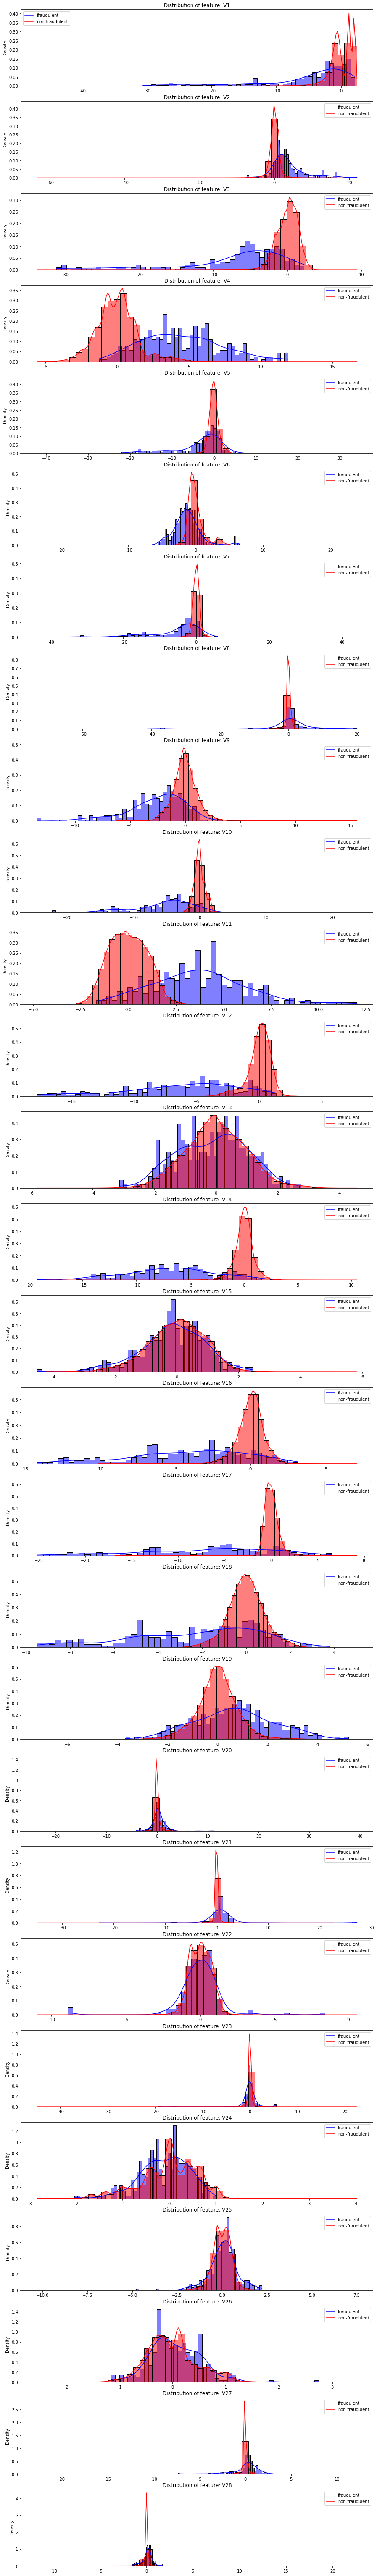

In [ ]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

In [ ]:
X_val

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
109846,71563.0,0.925008,-0.909714,-1.751856,-1.581058,1.641440,3.108494,-0.504386,0.788013,1.374169,-1.569156,0.172305,0.386514,-0.084155,-0.999275,1.381750,0.037265,0.382084,1.017689,0.779610,0.445395,0.001056,-0.339525,-0.335196,0.937656,0.765374,-0.631917,0.051295,0.081242,204.98
269086,163523.0,2.027173,-0.412225,-0.566664,0.335727,-0.470834,-0.180754,-0.673841,0.056778,1.489361,-0.110171,-1.261254,-0.074474,-0.534312,-0.003988,0.807987,0.243326,-0.620363,0.489627,-0.230122,-0.247890,0.246770,0.900270,0.099477,0.589843,-0.007056,-0.159665,0.028584,-0.036581,0.00
19318,30181.0,-0.310862,0.665544,1.132109,-1.395785,0.094205,-0.608843,0.519075,0.021262,0.195370,-0.656373,-1.249986,-0.414104,-0.092873,-0.084297,0.604148,0.907433,-0.984826,-0.067858,-0.444288,0.027600,-0.162844,-0.433266,-0.117894,-0.421754,-0.149291,0.775474,0.172402,0.058147,7.68
8453,11343.0,-1.216342,1.207394,0.895689,-0.920164,0.271890,-0.131006,-2.691676,-4.703902,1.799190,-0.304604,1.851298,-1.578382,0.912230,2.076511,-0.707477,0.959349,0.165629,0.456585,-0.673897,-1.213120,4.344770,-2.377525,-1.063526,-0.013533,0.156166,0.776587,0.283714,0.274623,11.64
153173,98106.0,-0.580809,0.089145,1.548566,-0.217748,1.000100,0.292264,0.450747,-0.430401,2.054456,-0.644576,-0.453349,-3.084038,1.646943,0.954123,0.686694,-0.162778,-0.147787,1.145497,0.577808,0.124993,-0.003552,0.621822,-0.393833,0.039816,0.020051,-0.509831,-0.276557,-0.269918,56.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14334,25415.0,-0.591087,1.516600,0.732251,2.865696,-0.165617,0.170427,0.032411,0.386203,-1.175383,0.954808,-0.611426,-0.340969,-0.091253,0.586792,1.339097,-0.216241,0.334775,-0.217098,0.279516,-0.183537,0.324782,0.783251,0.246676,0.080475,-1.399075,0.027424,-0.228338,0.193487,15.18
117234,74593.0,-1.560881,-1.648909,-2.303405,-0.535052,-0.277544,4.634097,2.683340,0.937987,-0.897058,-1.263317,-0.533977,-0.233099,0.080332,0.631402,0.411410,0.014262,-0.124824,0.303149,1.174368,1.888035,0.504266,-0.179614,1.918056,0.989968,0.232011,1.079168,-0.444888,0.009240,858.00
33280,37168.0,1.161528,0.152769,0.590332,0.503316,-0.342707,-0.317299,-0.122040,0.072599,-0.218040,0.061904,1.870560,1.160541,0.080870,0.494939,0.578579,0.151531,-0.315867,-0.551139,-0.263763,-0.128404,-0.166325,-0.487183,0.180698,0.216289,0.084443,0.094593,-0.016567,0.007141,0.89
83248,59755.0,-0.746647,1.345292,1.088696,0.984245,-0.309019,-0.635405,0.404954,0.325910,-0.783729,-0.378394,0.007372,0.213057,-0.165077,0.711091,1.208780,-0.654237,0.451566,-0.464295,-0.126196,-0.201010,0.273568,0.703285,0.006484,0.618984,-0.389604,-0.347254,-0.062433,0.095692,13.99


Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

**From the above histograms, Gaussian Mixture model with 2 component might be a good choice: A normal distribution with zero mean and small variance might be a good fit for the non-fraudulent data; while a normal distribution with non-zero mean and large variance may be a good fit for the fraudulent data. Different classes show very different patterns under some specific features, for example, V3, V4, V14 and V16. Whereas, some features might not have distinct patterns between 2 classes. This might suggest that feature selection should be conducted before fitting gaussian model.**

## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. 
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.5]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. Compute AUC and F1 score when you fit a Gaussian **only on non-fraudulent transactions** (instead of all the transactions).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table. **[0.8]**
 4. Are these results different or similar? Why?**[0.5]**





**Part A:**

In [ ]:
### fit a gaussian distribution ###
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score
gm = GaussianMixture(n_components=1)
result_a = pd.DataFrame(columns=('AUC_train','AUC_val'))
features=[f for f in df.columns if 'V' in f]
for i in features:
  gm.fit(X_train[i].values.reshape(-1,1))
  p_train=gm.score_samples(X_train[i].values.reshape(-1,1))
  auc_train=roc_auc_score(y_train, 1-p_train)
  p_val=gm.score_samples(X_val[i].values.reshape(-1,1))
  auc_val=roc_auc_score(y_val, 1-p_val)
  result_a.loc[len(result_a.index)]=[auc_train,auc_val]

In [ ]:
## Present AUC of both training and validation sets for each feature in a dataframe table ##
result_a.set_axis(['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'],axis=0,inplace=True)
result_a

,AUC_train,AUC_val
V1,0.705102,0.694811
V2,0.837499,0.837800
V3,0.876537,0.838364
V4,0.892103,0.888283
V5,0.771825,0.786857
V6,0.734380,0.673559
V7,0.862967,0.867423
V8,0.773238,0.774130
V9,0.802874,0.776739
V10,0.913600,0.905959


In [ ]:
# Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set #
result_a_sort=result_a.sort_values(by=['AUC_val'],ascending=False)
result_a_sort

,AUC_train,AUC_val
V14,0.952459,0.938073
V10,0.913600,0.905959
V4,0.892103,0.888283
V16,0.902137,0.882852
V11,0.897175,0.882058
V17,0.934852,0.881858
V7,0.862967,0.867423
V3,0.876537,0.838364
V12,0.920180,0.837909
V2,0.837499,0.837800


After sorting the results based on the AUC of the validation set, V14, V10, V4 have the highest AUC values among other features as shown above. We know that the higher the AUC, the better the performance of the model at distinguishing between the classes. Thus,  **V14, V10, V4** are the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions

In [ ]:
##Make a prediction based on a model's scores: If the score_samples is lower than a threshold, we consider that transaction as a fraud. 
##Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) 
##Compute F1 score using sklearn.metrics.f1_score.
import numpy as np
from sklearn.metrics import f1_score

##For feature V14##
gm14 = GaussianMixture(n_components=1)
gm14.fit(X_train['V14'].values.reshape(-1,1))
p14=gm14.score_samples(X_val['V14'].values.reshape(-1,1))
p14=pd.DataFrame(data=p14,columns=['likelihood'])
##Choose a range of possible threshold based on the 0.1%-5% quantiles of score_samples, and select 30 points within that range
threshold14=np.linspace(p14.quantile(0.001),p14.quantile(0.05),num=30)
threshold14
#initialize optimal threshold and maximum f1 score
optimal_threshold14=0
max_f1_14=0
#Find an optimal threshold that maximizes the F1 Score, and print the results
for j in range(len(threshold14)):
 p14['predict']=p14['likelihood'].apply(lambda x: 1 if x<threshold14[j,0] else 0)
 f1_14=f1_score(y_val,p14['predict'])
 if f1_14>max_f1_14:
    optimal_threshold14=threshold14[j,0]
    max_f1_14=f1_14
print("For V14, optimal threshold is:",optimal_threshold14)
print("For V14, Maximum F1 score is :",max_f1_14)


For V14, optimal threshold is: -19.47556141555924
For V14, Maximum F1 score is : 0.5901639344262295


In [ ]:
##For feature V10##
gm10 = GaussianMixture(n_components=1)
gm10.fit(X_train['V10'].values.reshape(-1,1))
p10=gm10.score_samples(X_val['V10'].values.reshape(-1,1))
p10=pd.DataFrame(data=p10,columns=['likelihood'])
##Choose a range of possible threshold based on the 0.01%-0.1% quantiles of score_samples, and select 30 points within that range
threshold10=np.linspace(p10.quantile(0.0001),p10.quantile(0.001),num=30)
threshold10
#initialize optimal threshold and maximum f1 score
optimal_threshold10=0
max_f1_10=0
#Find an optimal threshold that maximizes the F1 Score, and print the results
for j in range(len(threshold10)):
 p10['predict']=p10['likelihood'].apply(lambda x: 1 if x<threshold10[j,0] else 0)
 f1_10=f1_score(y_val,p10['predict'])
 if f1_10>max_f1_10:
    optimal_threshold10=threshold10[j,0]
    max_f1_10=f1_10
print("For V10, optimal threshold is:",optimal_threshold10)
print("For V10, Maximum F1 score is :",max_f1_10)


For V10, optimal threshold is: -58.315378476081165
For V10, Maximum F1 score is : 0.2558139534883721


In [ ]:
##For feature V4##
gm4 = GaussianMixture(n_components=1)
gm4.fit(X_train['V4'].values.reshape(-1,1))
p4=gm4.score_samples(X_val['V4'].values.reshape(-1,1))
p4=pd.DataFrame(data=p4,columns=['likelihood'])
##Choose a range of possible threshold based on the 0.01%-5% quantiles of score_samples, and select 30 points within that range
threshold4=np.linspace(p4.quantile(0.0001),p4.quantile(0.05),num=30)
threshold4
#initialize optimal threshold and maximum f1 score
optimal_threshold4=0
max_f1_4=0
#Find an optimal threshold that maximizes the F1 Score, and print the results
for j in range(len(threshold4)):
 p4['predict']=p4['likelihood'].apply(lambda x: 1 if x<threshold4[j,0] else 0)
 f1_4=f1_score(y_val,p4['predict'])
 if f1_4>max_f1_4:
    optimal_threshold4=threshold4[j,0]
    max_f1_4=f1_4
print("For V4, optimal threshold is:",optimal_threshold4)
print("For V4, Maximum F1 score is :",max_f1_4)


For V4, optimal threshold is: -8.852699031290484
For V4, Maximum F1 score is : 0.36090225563909767


Report the complexity of your method (Big O notation) for determining the optimal threshold: **My method is O(n).**

**Part B:**

In [ ]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
161145,113921.0,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,0.527911,0.505396,-0.742107,0.492430,-0.163585,-0.950404,0.262987,-1.760767,-0.939037,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,47.89
204520,135319.0,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,-1.208334,0.838156,1.511476,-0.042076,-0.002894,0.080270,-0.658905,-0.747678,0.431762,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,1.98
182659,125498.0,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,1.346697,0.140822,0.159637,-1.147153,0.664997,-0.133032,-1.267675,0.818995,0.405276,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,170.10
25117,33520.0,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,0.103615,-1.067971,-1.227629,0.197196,1.151364,0.846905,0.710309,-1.963506,0.130406,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,5.96
227642,145152.0,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,-0.706095,-0.612354,-0.336939,-1.384147,0.314279,0.552201,0.512582,0.370183,-0.163736,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,89.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,138459.0,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,-0.446486,-2.000050,-0.625697,-0.932355,1.105463,0.341994,-0.277885,0.227999,-0.130957,1.330776,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,49.89
86293,61167.0,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,-0.853181,1.005350,0.899184,1.394628,-0.461663,2.224552,-1.222268,1.405911,-2.125462,-0.905200,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,24.99
122579,76616.0,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,1.611424,0.536337,-0.557701,0.158524,0.125956,-0.242395,-0.116814,0.089840,0.233003,0.631084,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,34.90
152315,97253.0,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,0.470972,1.180940,-3.441205,-0.092307,1.359234,-0.674104,1.826172,0.513497,0.059191,0.495321,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,171.31


In [ ]:
#select only non-fraudulent transactions on X_trian
y_train_df=pd.DataFrame(data=y_train,columns=['Class'])
temp=pd.concat([X_train,y_train],axis=1)
nf=temp[temp['Class']==0]
X_train_nf=nf.drop(columns=['Class'])
X_train_nf


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
161145,113921.0,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,0.527911,0.505396,-0.742107,0.492430,-0.163585,-0.950404,0.262987,-1.760767,-0.939037,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,47.89
204520,135319.0,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,-1.208334,0.838156,1.511476,-0.042076,-0.002894,0.080270,-0.658905,-0.747678,0.431762,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,1.98
182659,125498.0,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,1.346697,0.140822,0.159637,-1.147153,0.664997,-0.133032,-1.267675,0.818995,0.405276,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,170.10
25117,33520.0,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,0.103615,-1.067971,-1.227629,0.197196,1.151364,0.846905,0.710309,-1.963506,0.130406,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,5.96
227642,145152.0,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,-0.706095,-0.612354,-0.336939,-1.384147,0.314279,0.552201,0.512582,0.370183,-0.163736,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,89.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,138459.0,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,-0.446486,-2.000050,-0.625697,-0.932355,1.105463,0.341994,-0.277885,0.227999,-0.130957,1.330776,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,49.89
86293,61167.0,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,-0.853181,1.005350,0.899184,1.394628,-0.461663,2.224552,-1.222268,1.405911,-2.125462,-0.905200,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,24.99
122579,76616.0,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,1.611424,0.536337,-0.557701,0.158524,0.125956,-0.242395,-0.116814,0.089840,0.233003,0.631084,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,34.90
152315,97253.0,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,0.470972,1.180940,-3.441205,-0.092307,1.359234,-0.674104,1.826172,0.513497,0.059191,0.495321,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,171.31


In [ ]:
### fit a gaussian distribution only on non-fraudulent transactions###
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score
gm_b = GaussianMixture(n_components=1)
result_b = pd.DataFrame(columns=('AUC_train','AUC_val'))
features_b=["V14","V10","V4"]
for i in features_b:
  gm_b.fit(X_train_nf[i].values.reshape(-1,1))
  p_train_b=gm_b.score_samples(X_train[i].values.reshape(-1,1))
  auc_train_b=roc_auc_score(y_train, 1-p_train_b)
  p_val_b=gm_b.score_samples(X_val[i].values.reshape(-1,1))
  auc_val_b=roc_auc_score(y_val, 1-p_val_b)
  result_b.loc[len(result_b.index)]=[auc_train_b,auc_val_b]

In [ ]:
result_b.set_axis(['V14','V10','V4'],axis=0,inplace=True)
result_b

,AUC_train,AUC_val
V14,0.952599,0.938072
V10,0.913558,0.905900
V4,0.892612,0.888803


In [ ]:
result=pd.concat([result_b,result_a_sort.iloc[:3]],axis=1)
result.columns=['AUC_train_valid','AUC_val_valid','AUC_train_full','AUC_val_full']
result
#AUC_train_valid and AUC_val_valid are obtained from part b by using only non-fraudulent data
#AUC_train_full and	AUC_val_full are obtained from part a by using full data

,AUC_train_valid,AUC_val_valid,AUC_train_full,AUC_val_full
V14,0.952599,0.938072,0.952459,0.938073
V10,0.913558,0.905900,0.913600,0.905959
V4,0.892612,0.888803,0.892103,0.888283


In [ ]:
##Calculate f1 for feature V14##
gm14_b = GaussianMixture(n_components=1)
gm14_b.fit(X_train_nf['V14'].values.reshape(-1,1))
p14_b=gm14_b.score_samples(X_val['V14'].values.reshape(-1,1))
p14_b=pd.DataFrame(data=p14_b,columns=['likelihood'])
##Choose a range of possible threshold based on the 0.1%-0.2% quantiles of score_samples, and select 30 points within that range
threshold14_b=np.linspace(p14_b.quantile(0.001),p14_b.quantile(0.002),num=30)
threshold14_b
#initialize optimal threshold and maximum f1 score
optimal_threshold14_b=0
max_f1_14_b=0
#Find an optimal threshold that maximizes the F1 Score, and print the results
for k in range(len(threshold14_b)):
 p14_b['predict']=p14_b['likelihood'].apply(lambda x: 1 if x<threshold14_b[k,0] else 0)
 f1_14_b=f1_score(y_val,p14_b['predict'])
 if f1_14_b>max_f1_14_b:
    optimal_threshold14_b=threshold14_b[k,0]
    max_f1_14_b=f1_14_b
print("In part b for V14, optimal threshold is:",optimal_threshold14_b)
print("In part b for V14, Maximum F1 score is :",max_f1_14_b)

In part b for V14, optimal threshold is: -21.92762244104974
In part b for V14, Maximum F1 score is : 0.5901639344262295


In [ ]:
##Calculate f1 for feature V10##
gm10_b = GaussianMixture(n_components=1)
gm10_b.fit(X_train_nf['V10'].values.reshape(-1,1))
p10_b=gm10_b.score_samples(X_val['V10'].values.reshape(-1,1))
p10_b=pd.DataFrame(data=p10_b,columns=['likelihood'])
##Choose a range of possible threshold based on the 0.04%-0.06% quantiles of score_samples, and select 30 points within that range
threshold10_b=np.linspace(p10_b.quantile(0.0004),p10_b.quantile(0.0006),num=30)
threshold10_b
#initialize optimal threshold and maximum f1 score
optimal_threshold10_b=0
max_f1_10_b=0
#Find an optimal threshold that maximizes the F1 Score, and print the results
for k in range(len(threshold10_b)):
 p10_b['predict']=p10_b['likelihood'].apply(lambda x: 1 if x<threshold10_b[k,0] else 0)
 f1_10_b=f1_score(y_val,p10_b['predict'])
 if f1_10_b>max_f1_10_b:
    optimal_threshold10_b=threshold10_b[k,0]
    max_f1_10_b=f1_10_b
print("In part b for V10, optimal threshold is:",optimal_threshold10_b)
print("In part b for V10, Maximum F1 score is :",max_f1_10_b)

In part b for V10, optimal threshold is: -63.470372325049055
In part b for V10, Maximum F1 score is : 0.25882352941176473


In [ ]:
##Calculate f1 for feature V4##
gm4_b = GaussianMixture(n_components=1)
gm4_b.fit(X_train_nf['V4'].values.reshape(-1,1))
p4_b=gm4_b.score_samples(X_val['V4'].values.reshape(-1,1))
p4_b=pd.DataFrame(data=p4_b,columns=['likelihood'])
##Choose a range of possible threshold based on the 0.05%-0.8% quantiles of score_samples, and select 30 points within that range
threshold4_b=np.linspace(p4_b.quantile(0.0005),p4_b.quantile(0.008),num=30)
threshold4_b
#initialize optimal threshold and maximum f1 score
optimal_threshold4_b=0
max_f1_4_b=0
#Find an optimal threshold that maximizes the F1 Score, and print the results
for k in range(len(threshold4_b)):
 p4_b['predict']=p4_b['likelihood'].apply(lambda x: 1 if x<threshold4_b[k,0] else 0)
 f1_4_b=f1_score(y_val,p4_b['predict'])
 if f1_4_b>max_f1_4_b:
    optimal_threshold4_b=threshold4_b[k,0]
    max_f1_4_b=f1_4_b
print("In part b for V4, optimal threshold is:",optimal_threshold4_b)
print("In part b for V4, Maximum F1 score is :",max_f1_4_b)

In part b for V4, optimal threshold is: -11.325075795198705
In part b for V4, Maximum F1 score is : 0.3619047619047619


In [ ]:
#create a table for all the f1 scores in part a and part b
f1_result=pd.DataFrame({
    'f1_valid':[max_f1_14_b,max_f1_10_b,max_f1_4_b],
    'f1_full':[max_f1_14,max_f1_10,max_f1_4]
},index = ['V14','V10','V4'])
f1_result

,f1_valid,f1_full
V14,0.590164,0.590164
V10,0.258824,0.255814
V4,0.361905,0.360902


In [ ]:
#Compare results from parts 2a and 2b (AUC and F1 score) in a table
#f1_valid is obtained from part b by using only non-fraudulent data
#f1_full is obtained from part a by using full data
pd.concat([result,f1_result],axis=1)

,AUC_train_valid,AUC_val_valid,AUC_train_full,AUC_val_full,f1_valid,f1_full
V14,0.952599,0.938072,0.952459,0.938073,0.590164,0.590164
V10,0.913558,0.905900,0.913600,0.905959,0.258824,0.255814
V4,0.892612,0.888803,0.892103,0.888283,0.361905,0.360902


**The results are pretty similar in part a and part b. This can be expected because the percentage of fraud(class=1) is only 0.17% in the original data set. No matter fitting on the full classes or fitting only on the non-fradulent class, the effect of fradulent class on the model will be very small. The model don't have enough fradulent examples to learn and couldn't capture the true patterns of the data. Thus, the predictions and accuracy of part a and part b models would have not much difference since two models have similar performance on the validation data. Therefore, the AUC and f1 scores are very close as shown above.**

## **Part 3: Multiple feature model with one Gaussian distribution: [1 Marks]**
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components.

  a. 2D plot:
 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis). 
 3. Color the data points based on their class (non-fraudulent blue and fraudulent red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). Explain.  **[0.25]**
 5. Fit your Gaussian model on all the data points. 
 6. Compute AUC on both training and validation sets 
 7. Pick 3 new pairs of features and repeat steps 2 to 6. **[0.25]**
 8. For each pair, find a threshold to maximize your validation set F1 Score.**[0.25]**
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial) **[0.25]**



**Pair 1:**

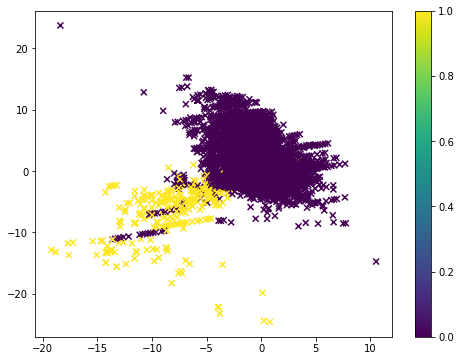

In [ ]:
#Pick two features V14 and V10, plot and color them based on their class
f1=X_train['V14']
f2=X_train['V10']
plt.figure(figsize=(8,6))
plt.scatter(f1,f2,marker="x",c=y_train,cmap='viridis');
plt.colorbar();

**Based on the plot above, we can see that the data is colored by 2 colors: yellow and purple. Therefore, the optimal number of Gaussian components (n_components) we need to fit the data is 2.**

In [ ]:
#create a data input using f1,f2 for fitting GaussianMixture(n_components=2)
pair1=pd.concat([f1,f2],axis=1)
pair1

,V14,V10
161145,0.492430,-0.362707
204520,-0.042076,0.028747
182659,-1.147153,1.404677
25117,0.197196,0.619206
227642,-1.384147,-1.033567
...,...,...
211543,1.105463,-0.446486
86293,-0.461663,-0.853181
122579,0.125956,1.611424
152315,1.359234,0.470972


In [ ]:
#create a data input using f1,f2 for validation data
f1_val=X_val['V14']
f2_val=X_val['V10']
pair1_val=pd.concat([f1_val,f2_val],axis=1)

In [ ]:
pair1_val

,V14,V10
109846,-0.999275,-1.569156
269086,-0.003988,-0.110171
19318,-0.084297,-0.656373
8453,2.076511,-0.304604
153173,0.954123,-0.644576
...,...,...
14334,0.586792,0.954808
117234,0.631402,-1.263317
33280,0.494939,0.061904
83248,0.711091,-0.378394


In [ ]:
#Fit a Gaussian model on all the data points, Compute AUC on both training and validation sets
gm_pair1 = GaussianMixture(n_components=2)
result_pair1 = pd.DataFrame(columns=('AUC_train','AUC_val'))
gm_pair1.fit(pair1.values)
p_train_pair1=gm_pair1.score_samples(pair1.values)
auc_train_pair1=roc_auc_score(y_train, 1-p_train_pair1)
p_val_pair1=gm_pair1.score_samples(pair1_val.values)
auc_val_pair1=roc_auc_score(y_val, 1-p_val_pair1)
result_pair1.loc[len(result_pair1.index)]=[auc_train_pair1,auc_val_pair1]

In [ ]:
result_pair1

,AUC_train,AUC_val
0,0.954392,0.952073


In [ ]:
##Calculate f1 score##
p_val_pair1=pd.DataFrame(data=p_val_pair1,columns=['likelihood'])
#Choose a range of possible threshold
threshold_pair1=np.linspace(p_val_pair1.quantile(0.0008),p_val_pair1.quantile(0.005),num=30)
threshold_pair1
#initialize optimal threshold and maximum f1 score
optimal_threshold_pair1=0
max_f1_pair1=0
#Find an optimal threshold that maximizes the F1 Score, and print the results
for p in range(len(threshold_pair1)):
 p_val_pair1['predict']=p_val_pair1['likelihood'].apply(lambda x: 1 if x<threshold_pair1[p,0] else 0)
 f1_pair1=f1_score(y_val,p_val_pair1['predict'])
 if f1_pair1>max_f1_pair1:
    optimal_threshold_pair1=threshold_pair1[p,0]
    max_f1_pair1=f1_pair1
print("For V14 and V10, optimal threshold is:",optimal_threshold_pair1)
print("For V14 and V10, Maximum F1 score is :",max_f1_pair1)

For V14 and V10, optimal threshold is: -11.253977250301002
For V14 and V10, Maximum F1 score is : 0.38028169014084506


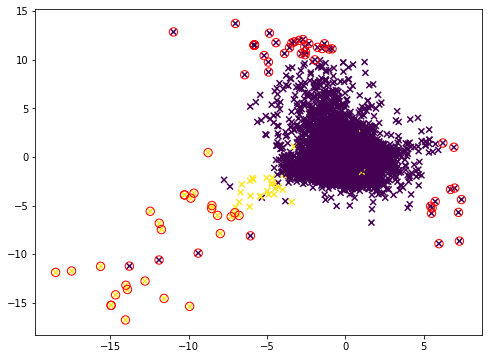

In [ ]:
#plot a figure similar to step 3 and put a circle around outliers based on threshold 
plt.figure(figsize=(8,6))
plt.scatter(f1_val,f2_val,marker="x",c=y_val,cmap='viridis');
#make sure that the index of validation likelihood is consistent with the validation dataset
p_val_pair1.index=f1_val.index
# Circling of anomalies
outliers_pair1 =p_val_pair1[p_val_pair1['likelihood']<optimal_threshold_pair1].index.tolist()
plt.scatter(f1_val[outliers_pair1],f2_val[outliers_pair1],marker="o",facecolor="none",edgecolor="r",s=70);

In [ ]:
len(outliers_pair1)

75

**Pair 2:**

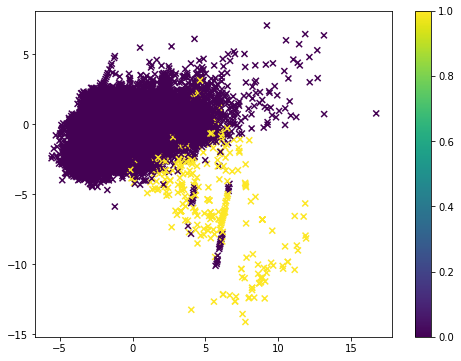

In [ ]:
###Pick new pair of features, V4 and V16, repeat steps 2 to 6###
f3=X_train['V4']
f4=X_train['V16']
plt.figure(figsize=(8,6))
plt.scatter(f3,f4,marker="x",c=y_train,cmap='viridis');
plt.colorbar();

**Based on the plot above, we can see that the data is colored by 2 colors: yellow and purple. Therefore, the optimal number of Gaussian components (n_components) we need to fit the data is 2.**

In [ ]:
pair2=pd.concat([f3,f4],axis=1)
pair2

,V4,V16
161145,-0.996032,-0.950404
204520,0.115021,0.080270
182659,0.687266,-0.133032
25117,-0.629355,0.846905
227642,-0.561114,0.552201
...,...,...
211543,0.154160,-0.277885
86293,0.213171,-1.222268
122579,-1.638850,-0.116814
152315,-0.619533,1.826172


In [ ]:
f3_val=X_val['V4']
f4_val=X_val['V16']
pair2_val=pd.concat([f3_val,f4_val],axis=1)
pair2_val

,V4,V16
109846,-1.581058,0.037265
269086,0.335727,0.243326
19318,-1.395785,0.907433
8453,-0.920164,0.959349
153173,-0.217748,-0.162778
...,...,...
14334,2.865696,-0.216241
117234,-0.535052,0.014262
33280,0.503316,0.151531
83248,0.984245,-0.654237


In [ ]:
#Fit a Gaussian model on all the data points, Compute AUC on both training and validation sets
gm_pair2 = GaussianMixture(n_components=2)
result_pair2 = pd.DataFrame(columns=('AUC_train','AUC_val'))
gm_pair2.fit(pair2.values)
p_train_pair2=gm_pair2.score_samples(pair2.values)
auc_train_pair2=roc_auc_score(y_train, 1-p_train_pair2)
p_val_pair2=gm_pair2.score_samples(pair2_val.values)
auc_val_pair2=roc_auc_score(y_val, 1-p_val_pair2)
result_pair2.loc[len(result_pair2.index)]=[auc_train_pair2,auc_val_pair2]

In [ ]:
result_pair2

,AUC_train,AUC_val
0,0.94248,0.92686


In [ ]:
##Calculate f1 score##
p_val_pair2=pd.DataFrame(data=p_val_pair2,columns=['likelihood'])
#Choose a range of possible thresholds
threshold_pair2=np.linspace(p_val_pair2.quantile(0.001),p_val_pair2.quantile(0.005),num=30)
threshold_pair2
#initialize optimal threshold and maximum f1 score
optimal_threshold_pair2=0
max_f1_pair2=0
#Find an optimal threshold that maximizes the F1 Score, and print the results
for q in range(len(threshold_pair2)):
 p_val_pair2['predict']=p_val_pair2['likelihood'].apply(lambda x: 1 if x<threshold_pair2[q,0] else 0)
 f1_pair2=f1_score(y_val,p_val_pair2['predict'])
 if f1_pair2>max_f1_pair2:
    optimal_threshold_pair2=threshold_pair2[q,0]
    max_f1_pair2=f1_pair2
print("For V4 and V16, optimal threshold is:",optimal_threshold_pair2)
print("For V4 and V16, Maximum F1 score is :",max_f1_pair2)

For V4 and V16, optimal threshold is: -9.883615141082723
For V4 and V16, Maximum F1 score is : 0.510948905109489


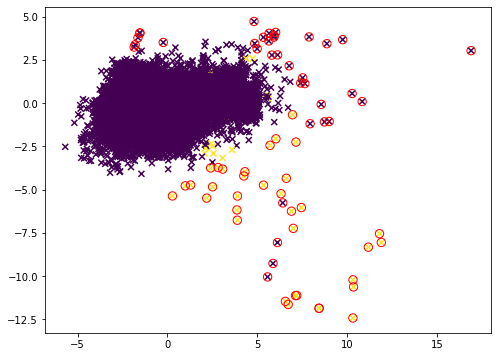

In [ ]:
#plot a figure similar to step 3 and put a circle around outliers based on threshold 
plt.figure(figsize=(8,6))
plt.scatter(f3_val,f4_val,marker="x",c=y_val,cmap='viridis');
#make sure that the index of validation likelihood is consistent with the validation dataset
p_val_pair2.index=f3_val.index
# Circling of anomalies
outliers_pair2 =p_val_pair2[p_val_pair2['likelihood']<optimal_threshold_pair2].index.tolist()
plt.scatter(f3_val[outliers_pair2],f4_val[outliers_pair2],marker="o",facecolor="none",edgecolor="r",s=70);

**Pair 3:**

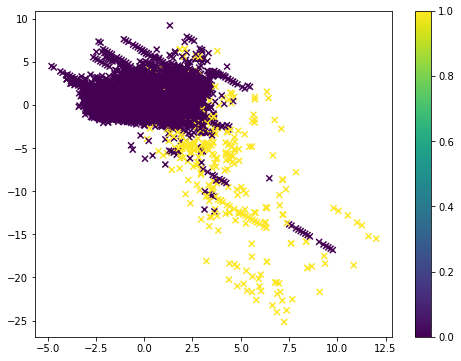

In [ ]:
###Pick new pair of features, V11 and V17, repeat steps 2 to 6###
f5=X_train['V11']
f6=X_train['V17']
plt.figure(figsize=(8,6))
plt.scatter(f5,f6,marker="x",c=y_train,cmap='viridis');
plt.colorbar();

**Based on the plot above, we can see that the data is colored by 2 colors: yellow and purple. Therefore, the optimal number of Gaussian components (n_components) we need to fit the data is 2.**

In [ ]:
pair3=pd.concat([f5,f6],axis=1)
pair3

,V11,V17
161145,0.527911,0.262987
204520,-1.208334,-0.658905
182659,1.346697,-1.267675
25117,0.103615,0.710309
227642,-0.706095,0.512582
...,...,...
211543,-2.000050,0.227999
86293,1.005350,1.405911
122579,0.536337,0.089840
152315,1.180940,0.513497


In [ ]:
f5_val=X_val['V11']
f6_val=X_val['V17']
pair3_val=pd.concat([f5_val,f6_val],axis=1)
pair3_val

,V11,V17
109846,0.172305,0.382084
269086,-1.261254,-0.620363
19318,-1.249986,-0.984826
8453,1.851298,0.165629
153173,-0.453349,-0.147787
...,...,...
14334,-0.611426,0.334775
117234,-0.533977,-0.124824
33280,1.870560,-0.315867
83248,0.007372,0.451566


In [ ]:
#Fit a Gaussian model on all the data points, Compute AUC on both training and validation sets
gm_pair3 = GaussianMixture(n_components=2)
result_pair3 = pd.DataFrame(columns=('AUC_train','AUC_val'))
gm_pair3.fit(pair3.values)
p_train_pair3=gm_pair3.score_samples(pair3.values)
auc_train_pair3=roc_auc_score(y_train, 1-p_train_pair3)
p_val_pair3=gm_pair3.score_samples(pair3_val.values)
auc_val_pair3=roc_auc_score(y_val, 1-p_val_pair3)
result_pair3.loc[len(result_pair3.index)]=[auc_train_pair3,auc_val_pair3]

In [ ]:
result_pair3

,AUC_train,AUC_val
0,0.949907,0.92529


In [ ]:
##Calculate f1 score##
p_val_pair3=pd.DataFrame(data=p_val_pair3,columns=['likelihood'])
#Choose a range of possible thresholds
threshold_pair3=np.linspace(p_val_pair3.quantile(0.0005),p_val_pair3.quantile(0.01),num=30)
threshold_pair3
#initialize optimal threshold and maximum f1 score
optimal_threshold_pair3=0
max_f1_pair3=0
#Find an optimal threshold that maximizes the F1 Score, and print the results
for q in range(len(threshold_pair3)):
 p_val_pair3['predict']=p_val_pair3['likelihood'].apply(lambda x: 1 if x<threshold_pair3[q,0] else 0)
 f1_pair3=f1_score(y_val,p_val_pair3['predict'])
 if f1_pair3>max_f1_pair3:
    optimal_threshold_pair3=threshold_pair3[q,0]
    max_f1_pair3=f1_pair3
print("For V11 and V17, optimal threshold is:",optimal_threshold_pair3)
print("For V11 and V17, Maximum F1 score is :",max_f1_pair3)

For V11 and V17, optimal threshold is: -11.593052657309237
For V11 and V17, Maximum F1 score is : 0.5283018867924528


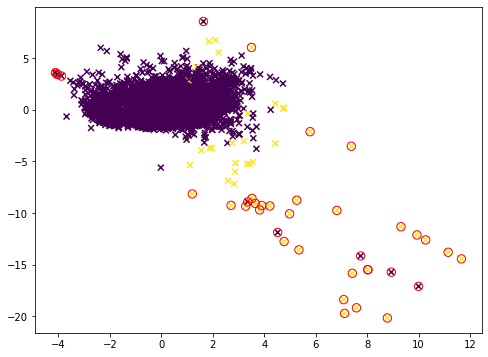

In [ ]:
#plot a figure similar to step 3 and put a circle around outliers based on threshold 
plt.figure(figsize=(8,6))
plt.scatter(f5_val,f6_val,marker="x",c=y_val,cmap='viridis');
#make sure that the index of validation likelihood is consistent with the validation dataset
p_val_pair3.index=f5_val.index
# Circling of anomalies
outliers_pair3 =p_val_pair3[p_val_pair3['likelihood']<optimal_threshold_pair3].index.tolist()
plt.scatter(f5_val[outliers_pair3],f6_val[outliers_pair3],marker="o",facecolor="none",edgecolor="r",s=70);

**Pair 4:**

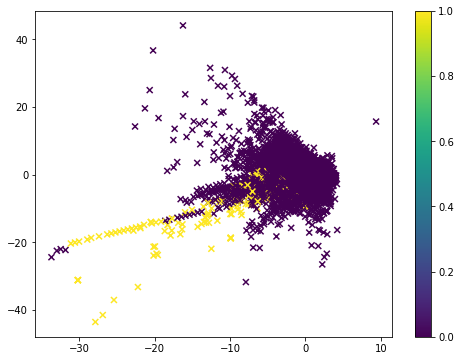

In [ ]:
###Pick new pair of features, V11 and V17, repeat steps 2 to 6###
f7=X_train['V3']
f8=X_train['V7']
plt.figure(figsize=(8,6))
plt.scatter(f7,f8,marker="x",c=y_train,cmap='viridis');
plt.colorbar();

**Based on the plot above, we can see that the data is colored by 2 colors: yellow and purple. Therefore, the optimal number of Gaussian components (n_components) we need to fit the data is 2.**

In [ ]:
pair4=pd.concat([f7,f8],axis=1)
pair4

,V3,V7
161145,-0.650588,0.496852
204520,-1.514760,0.199289
182659,1.573127,1.575093
25117,0.555143,-0.642128
227642,0.615391,0.984325
...,...,...
211543,-0.940861,0.490058
86293,1.478453,0.504752
122579,-0.219062,-0.669193
152315,-0.142182,-1.501980


In [ ]:
f7_val=X_val['V3']
f8_val=X_val['V7']
pair4_val=pd.concat([f7_val,f8_val],axis=1)
pair4_val

,V3,V7
109846,-1.751856,-0.504386
269086,-0.566664,-0.673841
19318,1.132109,0.519075
8453,0.895689,-2.691676
153173,1.548566,0.450747
...,...,...
14334,0.732251,0.032411
117234,-2.303405,2.683340
33280,0.590332,-0.122040
83248,1.088696,0.404954


In [ ]:
#Fit a Gaussian model on all the data points, Compute AUC on both training and validation sets
gm_pair4 = GaussianMixture(n_components=2)
result_pair4 = pd.DataFrame(columns=('AUC_train','AUC_val'))
gm_pair4.fit(pair4.values)
p_train_pair4=gm_pair4.score_samples(pair4.values)
auc_train_pair4=roc_auc_score(y_train, 1-p_train_pair4)
p_val_pair4=gm_pair4.score_samples(pair4_val.values)
auc_val_pair4=roc_auc_score(y_val, 1-p_val_pair4)
result_pair4.loc[len(result_pair4.index)]=[auc_train_pair4,auc_val_pair4]
result_pair4

,AUC_train,AUC_val
0,0.908765,0.890275


In [ ]:
##Calculate f1 score##
p_val_pair4=pd.DataFrame(data=p_val_pair4,columns=['likelihood'])
#Choose a range of possible thresholds
threshold_pair4=np.linspace(p_val_pair4.quantile(0.0005),p_val_pair4.quantile(0.005),num=30)
threshold_pair4
#initialize optimal threshold and maximum f1 score
optimal_threshold_pair4=0
max_f1_pair4=0
#Find an optimal threshold that maximizes the F1 Score, and print the results
for q in range(len(threshold_pair4)):
 p_val_pair4['predict']=p_val_pair4['likelihood'].apply(lambda x: 1 if x<threshold_pair4[q,0] else 0)
 f1_pair4=f1_score(y_val,p_val_pair4['predict'])
 if f1_pair4>max_f1_pair4:
    optimal_threshold_pair4=threshold_pair4[q,0]
    max_f1_pair4=f1_pair4
print("For V3 and V7, optimal threshold is:",optimal_threshold_pair4)
print("For V3 and V7, Maximum F1 score is :",max_f1_pair4)

For V3 and V7, optimal threshold is: -13.673841031741304
For V3 and V7, Maximum F1 score is : 0.2376237623762376


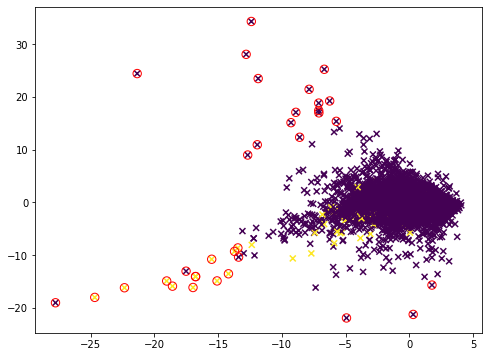

In [ ]:
#plot a figure similar to step 3 and put a circle around outliers based on threshold 
plt.figure(figsize=(8,6))
plt.scatter(f7_val,f8_val,marker="x",c=y_val,cmap='viridis');
#make sure that the index of validation likelihood is consistent with the validation dataset
p_val_pair4.index=f7_val.index
# Circling of anomalies
outliers_pair4 =p_val_pair4[p_val_pair4['likelihood']<optimal_threshold_pair4].index.tolist()
plt.scatter(f7_val[outliers_pair4],f8_val[outliers_pair4],marker="o",facecolor="none",edgecolor="r",s=70);

## **Part 4: Single feature model with two Gaussian distributions. [2 Marks]**
Now we will use two different distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.25]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.25]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c? **[1]**

In [ ]:
### seperate the training data based on their classes ###
y_train_df=pd.DataFrame(data=y_train,columns=['Class'])
temp=pd.concat([X_train,y_train],axis=1)
nf=temp[temp['Class']==0]
f=temp[temp['Class']==1]
X_train_nf=nf.drop(columns=['Class'])
X_train_f=f.drop(columns=['Class'])

In [ ]:
X_train_nf

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
161145,113921.0,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,0.527911,0.505396,-0.742107,0.492430,-0.163585,-0.950404,0.262987,-1.760767,-0.939037,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,47.89
204520,135319.0,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,-1.208334,0.838156,1.511476,-0.042076,-0.002894,0.080270,-0.658905,-0.747678,0.431762,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,1.98
182659,125498.0,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,1.346697,0.140822,0.159637,-1.147153,0.664997,-0.133032,-1.267675,0.818995,0.405276,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,170.10
25117,33520.0,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,0.103615,-1.067971,-1.227629,0.197196,1.151364,0.846905,0.710309,-1.963506,0.130406,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,5.96
227642,145152.0,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,-0.706095,-0.612354,-0.336939,-1.384147,0.314279,0.552201,0.512582,0.370183,-0.163736,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,89.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,138459.0,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,-0.446486,-2.000050,-0.625697,-0.932355,1.105463,0.341994,-0.277885,0.227999,-0.130957,1.330776,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,49.89
86293,61167.0,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,-0.853181,1.005350,0.899184,1.394628,-0.461663,2.224552,-1.222268,1.405911,-2.125462,-0.905200,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,24.99
122579,76616.0,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,1.611424,0.536337,-0.557701,0.158524,0.125956,-0.242395,-0.116814,0.089840,0.233003,0.631084,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,34.90
152315,97253.0,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,0.470972,1.180940,-3.441205,-0.092307,1.359234,-0.674104,1.826172,0.513497,0.059191,0.495321,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,171.31


In [ ]:
X_train_f

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
41569,40742.0,-2.377533,0.520539,-8.094139,8.005351,2.640750,-3.381586,-1.934372,0.562322,-3.104027,-3.051210,5.735763,-4.747693,-0.784223,-10.716339,0.656517,-1.142467,0.918591,1.126335,0.092973,-0.634747,0.148284,0.721100,2.661291,-0.508620,-0.401657,0.587611,0.500326,0.551760,1.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
222419,142961.0,0.457845,1.373769,-0.488926,2.805351,1.777386,0.100492,1.295016,-0.135857,-1.695822,0.955004,-1.702228,-0.240056,0.456475,0.139567,-1.890974,0.372379,-0.798201,-0.697062,-1.497152,-0.264705,0.105593,0.371014,0.051105,0.401524,-0.724766,-0.202881,0.092124,0.094956,0.00
234633,148053.0,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,-3.202436,1.991361,-3.986416,0.577207,-8.485795,-0.794782,-0.666134,-1.372629,-0.104313,-1.466911,0.313332,0.209086,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,1.59
79835,58199.0,0.340391,2.015233,-2.777330,3.812024,-0.461729,-1.152022,-2.001959,0.548681,-2.344042,-3.076699,3.554738,-3.969689,-0.932184,-5.876067,-0.066739,-1.495281,-4.424757,-0.619323,-0.231198,0.326773,0.299769,-0.583283,-0.187696,-0.329256,0.732328,0.058080,0.553143,0.318832,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,8878.0,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,-3.831154,-7.191604,7.102989,-9.928700,-0.067498,-10.924187,-1.697914,-2.379421,-2.775114,0.273799,-1.382188,0.399097,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937,1.00
145800,87202.0,-0.419820,-1.155978,-2.092516,2.786750,0.736297,-0.167292,1.600027,-0.117427,-0.796954,-0.133950,1.033032,-0.284368,-1.208280,-0.429212,0.248945,-0.928922,1.679986,1.315339,2.226161,1.275358,0.480640,0.533517,1.284645,0.516131,-0.602941,-0.305024,-0.021363,0.129096,451.27
73784,55279.0,-5.753852,0.577610,-6.312782,5.159401,-1.698320,-2.683286,-7.934389,2.373550,-3.073079,-7.145137,6.250068,-9.150823,-1.376141,-9.982585,1.202217,-7.565042,-13.691474,-4.366867,2.181423,0.017500,1.177852,0.175331,-1.211123,-0.446891,-0.405520,-0.165797,1.505516,0.359492,1.00
42756,41233.0,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,-12.888158,6.854953,-13.211695,1.035612,-13.778956,1.040448,-11.290328,-20.578022,-7.547824,3.118480,-0.046170,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,0.00


In [ ]:
#Fit a Gaussian distribution ( G1 ) on a feature of non-fraudulent transactions using sklearn.mixture.GaussianMixture when n_components=1
G1=GaussianMixture(n_components=1)
G1.fit(X_train_nf['V14'].values.reshape(-1,1))
#compute score_samples of both training and validation data of non-fraudulent transactions
p_train_G1=G1.score_samples(X_train['V14'].values.reshape(-1,1))
S1=G1.score_samples(X_val['V14'].values.reshape(-1,1))
S1

array([-1.44552169, -0.81150367, -0.81710043, ..., -0.95592527,
       -1.11433211, -0.99339752])

In [ ]:
#Fit a Gaussian distribution ( G2 ) on the same feature of fraudulent transactions using sklearn.mixture.GaussianMixture when n_components=1
G2=GaussianMixture(n_components=1)
G2.fit(X_train_f['V14'].values.reshape(-1,1))
#compute score_samples of both training and validation data of fraudulent transactions
p_train_G2=G2.score_samples(X_train['V14'].values.reshape(-1,1))
S2=G2.score_samples(X_val['V14'].values.reshape(-1,1))
S2

array([-3.36211866, -3.74327983, -3.71031619, ..., -3.95675023,
       -4.05387698, -3.98297185])

In [ ]:
#consider c in  [0,10]  with steps of 0.5
c=np.arange(0,10.5,0.5)
#Find an optimal c (a real number) that maximizes validation set F1 Score for a model such that if S1<c*S2 , the transaction is classified as a fraud. 
max_f1_part4=0
best_c=0
for h in c:
 predict_part4=[]
 for i in range(len(S1)):
  if S1[i]<h*S2[i]:
    predict_part4.append(1)
  else:
    predict_part4.append(0)
 f1_part4=f1_score(y_val,predict_part4)
 if f1_part4>max_f1_part4:
  best_c=h
  max_f1_part4=f1_part4
print("For V14, optimal c is:",best_c)
print("For V14, Maximum F1 score is :",max_f1_part4)

For V14, optimal c is: 9.5
For V14, Maximum F1 score is : 0.625


In [ ]:
#Define a  function find_c to get the optimal value of c by maximizing f1
def find_c(S1,S2,c,true_y):
  max_f1_part4=0
  best_c=0
  for h in c:
   predict_part4=[]
   for i in range(len(S1)):
    if S1[i]<h*S2[i]:
     predict_part4.append(1)
    else:
     predict_part4.append(0)
   f1_part4=f1_score(true_y,predict_part4)
   if f1_part4>max_f1_part4:
    best_c=h
    max_f1_part4=f1_part4
  return best_c, max_f1_part4
  

In [ ]:
#Repeat the steps above for all the features. What is the best F1 Score that you get for validation? Which feature and what c?
features=[f for f in df.columns if 'V' in f]
part4_val_result=pd.DataFrame(columns=['f1_val','c_val'])
c=np.arange(0,10.5,0.5)
for r in features:
 G1=GaussianMixture(n_components=1)
 G1.fit(X_train_nf[r].values.reshape(-1,1))
#compute score_samples of both training and validation data of non-fraudulent transactions
 p_train_G1=G1.score_samples(X_train[r].values.reshape(-1,1))
 S1=G1.score_samples(X_val[r].values.reshape(-1,1))
 
 G2=GaussianMixture(n_components=1)
 G2.fit(X_train_f[r].values.reshape(-1,1))
#compute score_samples of both training and validation data of fraudulent transactions
 p_train_G2=G2.score_samples(X_train[r].values.reshape(-1,1))
 S2=G2.score_samples(X_val[r].values.reshape(-1,1))
#call the function find_c to get the optimal value of c by maximizing f1
 c_optimal,f1score=find_c(S1,S2,c,y_val)
 part4_val_result=part4_val_result.append({'f1_val':f1score,'c_val':c_optimal},ignore_index=True)
 

 

In [ ]:
#Show the results on validation data
part4_val_result.set_axis(['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'],axis=0,inplace=True)
part4_val_result

,f1_val,c_val
V1,0.097087,5.0
V2,0.108597,3.5
V3,0.273684,10.0
V4,0.363636,4.5
V5,0.146067,5.0
V6,0.096070,2.0
V7,0.206452,7.5
V8,0.036585,4.5
V9,0.323810,3.0
V10,0.337079,8.5


In [ ]:
part4_val_result[part4_val_result['f1_val']==max(part4_val_result['f1_val'])]

,f1_val,c_val
V17,0.648649,7.0


**Based on the dataframe above, we know that the best f1 score for validation data is 0.648649 using V17, and the corresponding best c value is 7.**

In [ ]:
#Repeat the steps above for all the features. What is the best F1 Score that you get for training data? Which feature and what c?
features=[f for f in df.columns if 'V' in f]
part4_train_result=pd.DataFrame(columns=['f1_train','c_val'])
c=np.arange(0,10.5,0.5)
for r in features:
 G1=GaussianMixture(n_components=1)
 G1.fit(X_train_nf[r].values.reshape(-1,1))
#compute score_samples of both training and validation data of non-fraudulent transactions
 p_train_G1=G1.score_samples(X_train[r].values.reshape(-1,1))
 
 G2=GaussianMixture(n_components=1)
 G2.fit(X_train_f[r].values.reshape(-1,1))
#compute score_samples of both training and validation data of fraudulent transactions
 p_train_G2=G2.score_samples(X_train[r].values.reshape(-1,1))
 
#use the best c values from validation set to make predition on the training set
 c_val=part4_val_result.loc[r,'c_val']
 predict_training=[]
 for i in range(len(p_train_G1)):
    if p_train_G1[i]<c_val*p_train_G2[i]:
     predict_training.append(1)
    else:
     predict_training.append(0)
 f1_part4_train=f1_score(y_train,predict_training)
#print all results in a dataframe part4_train_result  
 part4_train_result=part4_train_result.append({'f1_train':f1_part4_train,'c_val':c_val},ignore_index=True)
 

In [ ]:
#Show the results on validation data
part4_train_result.set_axis(['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28'],axis=0,inplace=True)
part4_train_result

,f1_train,c_val
V1,0.122651,5.0
V2,0.122151,3.5
V3,0.268537,10.0
V4,0.348837,4.5
V5,0.162544,5.0
V6,0.085821,2.0
V7,0.223338,7.5
V8,0.068268,4.5
V9,0.421252,3.0
V10,0.414079,8.5


In [ ]:
part4_train_result[part4_train_result['f1_train']==max(part4_train_result['f1_train'])]

,f1_train,c_val
V12,0.686667,5.0


**Based on the dataframe above, we know that the best f1 score for training data is 0.686667 using V12, and the corresponding best c value is 5.**

## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[4]**


**HINT !**

You might want to try a two-gaussian model, multiple features, a single component for the valid transaction, and multiple components for fraudulent ones! Why does it make sense to have multiple components for fraudulent transactions?

In [ ]:
### model 1: a Gaussian mixtrue model of n_components=1 with 1 features('V16') ###
gm_m1 = GaussianMixture(n_components=1)
X_train_m1=X_train.loc[:,['V16']]
gm_m1.fit(X_train_m1.values.reshape(-1,1))
p_train_m1=gm_m1.score_samples(X_train_m1.values.reshape(-1,1))
auc_train_m1=roc_auc_score(y_train, 1-p_train_m1)
  
p_val_m1=gm_m1.score_samples(X_val['V16'].values.reshape(-1,1))
auc_val_m1=roc_auc_score(y_val, 1-p_val_m1)

print("For model 1 the AUC on training set is :",auc_train_m1 )
print("For model 1 the AUC on validation set is :",auc_val_m1 )

For model 1 the AUC on training set is : 0.9021367779975271
For model 1 the AUC on validation set is : 0.8828515321829452


In [ ]:
df_p_val_m1=pd.DataFrame(data=p_val_m1,columns=['likelihood'])
##Choose a range of possible threshold
threshold_m1=np.linspace(df_p_val_m1.quantile(0.001),df_p_val_m1.quantile(0.05),num=30)
#initialize optimal threshold and maximum f1 score
optimal_threshold_m1=0
max_f1_m1=0
#Find an optimal threshold that maximizes the F1 Score, and print the results
for j in range(len(threshold_m1)):
 df_p_val_m1['predict']=df_p_val_m1['likelihood'].apply(lambda x: 1 if x<threshold_m1[j,0] else 0)
 f1_m1=f1_score(y_val,df_p_val_m1['predict'])
 if f1_m1>max_f1_m1:
    optimal_threshold_m1=threshold_m1[j,0]
    max_f1_m1=f1_m1
print("For model 1, optimal threshold is:",optimal_threshold_m1)
print("For model 1, Maximum F1 score on validation set is :",max_f1_m1)

For model 1, optimal threshold is: -9.808724208248876
For model 1, Maximum F1 score on validation set is : 0.5210084033613446


In [ ]:
#Use the threshold we get above to calculate f1 score of training data
df_p_train_m1=pd.DataFrame(data=p_train_m1,columns=['likelihood'])
df_p_train_m1['predict']=df_p_train_m1['likelihood'].apply(lambda x: 1 if x<optimal_threshold_m1 else 0)
f1_train_m1=f1_score(y_train,df_p_train_m1['predict'])
print("For model 1, Maximum F1 score on training set is :",f1_train_m1)

For model 1, Maximum F1 score on training set is : 0.4985074626865672


In [ ]:
### model 2: a Gaussian mixtrue model of n_components=2 with 6 features('V14','V10','V4','V16','V11','V17') ###
X_train_m2=X_train.loc[:,['V14','V10','V4','V16','V11','V17']]
X_val_m2=X_val.loc[:,['V14','V10','V4','V16','V11','V17']]
gm_m2 = GaussianMixture(n_components=2)
gm_m2.fit(X_train_m2.values)
p_train_m2=gm_m2.score_samples(X_train_m2.values)
auc_train_m2=roc_auc_score(y_train, 1-p_train_m2)
  
p_val_m2=gm_m2.score_samples(X_val_m2.values)
auc_val_m2=roc_auc_score(y_val, 1-p_val_m2)

print("For model 2 the AUC on training set is :",auc_train_m2 )
print("For model 2 the AUC on validation set is :",auc_val_m2 )

For model 2 the AUC on training set is : 0.9630987675708771
For model 2 the AUC on validation set is : 0.9537339326717096


In [ ]:
##Calculate f1 score##
p_val_m2=pd.DataFrame(data=p_val_m2,columns=['likelihood'])
#Choose a range of possible threshold
threshold_m2=np.linspace(p_val_m2.quantile(0.001),p_val_m2.quantile(0.003),num=30)

#initialize optimal threshold and maximum f1 score
optimal_threshold_m2=0
max_f1_m2=0
#Find an optimal threshold that maximizes the F1 Score, and print the results
for p in range(len(threshold_m2)):
 p_val_m2['predict']=p_val_m2['likelihood'].apply(lambda x: 1 if x<threshold_m2[p,0] else 0)
 f1_m2=f1_score(y_val,p_val_m2['predict'])
 if f1_m2>max_f1_m2:
    optimal_threshold_m2=threshold_m2[p,0]
    max_f1_m2=f1_m2
print("For model 2, optimal threshold is:",optimal_threshold_m2)
print("For model 2, Maximum F1 score for validation set is :",max_f1_m2)

For model 2, optimal threshold is: -22.295453007432748
For model 2, Maximum F1 score for validation set is : 0.47933884297520657


In [ ]:
#Use the threshold we get above to calculate f1 score of training data
df_p_train_m2=pd.DataFrame(data=p_train_m2,columns=['likelihood'])
df_p_train_m2['predict']=df_p_train_m2['likelihood'].apply(lambda x: 1 if x<optimal_threshold_m2 else 0)
f1_train_m2=f1_score(y_train,df_p_train_m2['predict'])
print("For model 2, Maximum F1 score on training set is :",f1_train_m2)

For model 2, Maximum F1 score on training set is : 0.4878048780487804


In [ ]:
### model 3: a Gaussian mixtrue model of n_components=2 with 3 features ###
X_train_m3=X_train.loc[:,['V14','V10','V16']]
X_val_m3=X_val.loc[:,['V14','V10','V16']]
gm_m3 = GaussianMixture(n_components=2)
gm_m3.fit(X_train_m3.values)
p_train_m3=gm_m3.score_samples(X_train_m3.values)
auc_train_m3=roc_auc_score(y_train, 1-p_train_m3)
  
p_val_m3=gm_m3.score_samples(X_val_m3.values)
auc_val_m3=roc_auc_score(y_val, 1-p_val_m3)

print("For model 3 the AUC on training set is :",auc_train_m3 )
print("For model 3 the AUC on validation set is :",auc_val_m3 )

For model 3 the AUC on training set is : 0.951621864666479
For model 3 the AUC on validation set is : 0.9512939592374322


In [ ]:
##Calculate f1 score##
p_val_m3=pd.DataFrame(data=p_val_m3,columns=['likelihood'])
#Choose a range of possible threshold
threshold_m3=np.linspace(p_val_m3.quantile(0.0008),p_val_m3.quantile(0.002),num=30)

#initialize optimal threshold and maximum f1 score
optimal_threshold_m3=0
max_f1_m3=0
#Find an optimal threshold that maximizes the F1 Score, and print the results
for p in range(len(threshold_m3)):
 p_val_m3['predict']=p_val_m3['likelihood'].apply(lambda x: 1 if x<threshold_m3[p,0] else 0)
 f1_m3=f1_score(y_val,p_val_m3['predict'])
 if f1_m3>max_f1_m3:
    optimal_threshold_m3=threshold_m3[p,0]
    max_f1_m3=f1_m3
print("For model 3, optimal threshold is:",optimal_threshold_m3)
print("For model 3, Maximum F1 score for validation set is :",max_f1_m3)

For model 3, optimal threshold is: -13.409860969212245
For model 3, Maximum F1 score for validation set is : 0.44274809160305345


In [ ]:
#Use the threshold we get above to calculate f1 score of training data
df_p_train_m3=pd.DataFrame(data=p_train_m3,columns=['likelihood'])
df_p_train_m3['predict']=df_p_train_m3['likelihood'].apply(lambda x: 1 if x<optimal_threshold_m3 else 0)
f1_train_m3=f1_score(y_train,df_p_train_m3['predict'])
print("For model 3, Maximum F1 score on training set is :",f1_train_m3)

For model 3, Maximum F1 score on training set is : 0.4860335195530726


In [ ]:
### model 4: a Gaussian mixtrue model of n_components=2 with full features ###
gm_m4 = GaussianMixture(n_components=2)
gm_m4.fit(X_train.values)
p_train_m4=gm_m4.score_samples(X_train.values)
auc_train_m4=roc_auc_score(y_train, 1-p_train_m4)
  
p_val_m4=gm_m4.score_samples(X_val.values)
auc_val_m4=roc_auc_score(y_val, 1-p_val_m4)

print("For model 4 the AUC on training set is :",auc_train_m4 )
print("For model 4 the AUC on validation set is :",auc_val_m4 )

For model 4 the AUC on training set is : 0.9343058571860192
For model 4 the AUC on validation set is : 0.9151191573431198


In [ ]:
##Calculate f1 score##
p_val_m4=pd.DataFrame(data=p_val_m4,columns=['likelihood'])
#Choose a range of possible threshold
threshold_m4=np.linspace(p_val_m4.quantile(0.0003),p_val_m4.quantile(0.001),num=30)

#initialize optimal threshold and maximum f1 score
optimal_threshold_m4=0
max_f1_m4=0
#Find an optimal threshold that maximizes the F1 Score, and print the results
for p in range(len(threshold_m4)):
 p_val_m4['predict']=p_val_m4['likelihood'].apply(lambda x: 1 if x<threshold_m4[p,0] else 0)
 f1_m4=f1_score(y_val,p_val_m4['predict'])
 if f1_m4>max_f1_m4:
    optimal_threshold_m4=threshold_m4[p,0]
    max_f1_m4=f1_m4
print("For model 4, optimal threshold is:",optimal_threshold_m4)
print("For model 4, Maximum F1 score for validation set is :",max_f1_m4)

For model 4, optimal threshold is: -371.0182413563713
For model 4, Maximum F1 score for validation set is : 0.24742268041237114


In [ ]:
#Use the threshold we get above to calculate f1 score of training data
df_p_train_m4=pd.DataFrame(data=p_train_m4,columns=['likelihood'])
df_p_train_m4['predict']=df_p_train_m4['likelihood'].apply(lambda x: 1 if x<optimal_threshold_m4 else 0)
f1_train_m4=f1_score(y_train,df_p_train_m4['predict'])
print("For model 4, Maximum F1 score on training set is :",f1_train_m4)

For model 4, Maximum F1 score on training set is : 0.25000000000000006


In [ ]:
### model 5: a Gaussian mixtrue model of n_components=3 with 6 features('V14','V10','V4','V16','V11','V17') ###
X_train_m5=X_train.loc[:,['V14','V10','V4','V16','V11','V17']]
X_val_m5=X_val.loc[:,['V14','V10','V4','V16','V11','V17']]
gm_m5 = GaussianMixture(n_components=3)
gm_m5.fit(X_train_m5.values)
p_train_m5=gm_m5.score_samples(X_train_m5.values)
auc_train_m5=roc_auc_score(y_train, 1-p_train_m5)
  
p_val_m5=gm_m5.score_samples(X_val_m5.values)
auc_val_m5=roc_auc_score(y_val, 1-p_val_m5)

print("For model 5 the AUC on training set is :",auc_train_m5 )
print("For model 5 the AUC on validation set is :",auc_val_m5 )

For model 5 the AUC on training set is : 0.9624610744688202
For model 5 the AUC on validation set is : 0.9595740526513584


In [ ]:
##Calculate f1 score##
p_val_m5=pd.DataFrame(data=p_val_m5,columns=['likelihood'])
#Choose a range of possible threshold
threshold_m5=np.linspace(p_val_m5.quantile(0.0006),p_val_m5.quantile(0.002),num=30)

#initialize optimal threshold and maximum f1 score
optimal_threshold_m5=0
max_f1_m5=0
#Find an optimal threshold that maximizes the F1 Score, and print the results
for p in range(len(threshold_m5)):
 p_val_m5['predict']=p_val_m5['likelihood'].apply(lambda x: 1 if x<threshold_m5[p,0] else 0)
 f1_m5=f1_score(y_val,p_val_m5['predict'])
 if f1_m5>max_f1_m5:
    optimal_threshold_m5=threshold_m5[p,0]
    max_f1_m5=f1_m5
print("For model 5, optimal threshold is:",optimal_threshold_m5)
print("For model 5, Maximum F1 score for validation set is :",max_f1_m5)

For model 5, optimal threshold is: -21.22653176871585
For model 5, Maximum F1 score for validation set is : 0.4393939393939394


In [ ]:
#Use the threshold we get above to calculate f1 score of training data
df_p_train_m5=pd.DataFrame(data=p_train_m5,columns=['likelihood'])
df_p_train_m5['predict']=df_p_train_m5['likelihood'].apply(lambda x: 1 if x<optimal_threshold_m5 else 0)
f1_train_m5=f1_score(y_train,df_p_train_m5['predict'])
print("For model 5, Maximum F1 score on training set is :",f1_train_m5)

For model 5, Maximum F1 score on training set is : 0.46241134751773055


In [ ]:
### model 6: a Gaussian mixtrue model of n_components=3 with 2 features('V10','V12') ###
X_train_m6=X_train.loc[:,['V10','V12']]
X_val_m6=X_val.loc[:,['V10','V12']]
gm_m6 = GaussianMixture(n_components=3)
gm_m6.fit(X_train_m6.values)
p_train_m6=gm_m6.score_samples(X_train_m6.values)
auc_train_m6=roc_auc_score(y_train, 1-p_train_m6)
  
p_val_m6=gm_m6.score_samples(X_val_m6.values)
auc_val_m6=roc_auc_score(y_val, 1-p_val_m6)

print("For model 6 the AUC on training set is :",auc_train_m6 )
print("For model 6 the AUC on validation set is :",auc_val_m6 )

For model 6 the AUC on training set is : 0.9399066187766939
For model 6 the AUC on validation set is : 0.9136715494128737


In [ ]:
##Calculate f1 score##
p_val_m6=pd.DataFrame(data=p_val_m6,columns=['likelihood'])
#Choose a range of possible threshold
threshold_m6=np.linspace(p_val_m6.quantile(0.0005),p_val_m6.quantile(0.001),num=30)

#initialize optimal threshold and maximum f1 score
optimal_threshold_m6=0
max_f1_m6=0
#Find an optimal threshold that maximizes the F1 Score, and print the results
for p in range(len(threshold_m6)):
 p_val_m6['predict']=p_val_m6['likelihood'].apply(lambda x: 1 if x<threshold_m6[p,0] else 0)
 f1_m6=f1_score(y_val,p_val_m6['predict'])
 if f1_m6>max_f1_m6:
    optimal_threshold_m6=threshold_m6[p,0]
    max_f1_m6=f1_m6
print("For model 6, optimal threshold is:",optimal_threshold_m6)
print("For model 6, Maximum F1 score for validation set is :",max_f1_m6)

For model 6, optimal threshold is: -12.3543160797022
For model 6, Maximum F1 score for validation set is : 0.3516483516483516


In [ ]:
#Use the threshold we get above to calculate f1 score of training data
df_p_train_m6=pd.DataFrame(data=p_train_m6,columns=['likelihood'])
df_p_train_m6['predict']=df_p_train_m6['likelihood'].apply(lambda x: 1 if x<optimal_threshold_m6 else 0)
f1_train_m6=f1_score(y_train,df_p_train_m6['predict'])
print("For model 6, Maximum F1 score on training set is :",f1_train_m6)

For model 6, Maximum F1 score on training set is : 0.39425051334702266


In [ ]:
### model 7: 2 Gaussian mixtrue model of n_components=1 with 2 features('V14','V16') ###
X_train_nf_m7=X_train_nf.loc[:,['V14','V16']]
X_train_f_m7=X_train_f.loc[:,['V14','V16']]
X_train_m7=X_train.loc[:,['V14','V16']]
X_val_m7=X_val.loc[:,['V14','V16']]
G1_m7=GaussianMixture(n_components=1)
G1_m7.fit(X_train_nf_m7.values)
#compute score_samples of both training and validation data of non-fraudulent transactions
p_train_G1_m7=G1_m7.score_samples(X_train_m7.values)
S1_m7=G1_m7.score_samples(X_val_m7.values)

G2_m7=GaussianMixture(n_components=1)
G2_m7.fit(X_train_f_m7.values)
#compute score_samples of both training and validation data of fraudulent transactions
p_train_G2_m7=G2_m7.score_samples(X_train_m7.values)
S2_m7=G2_m7.score_samples(X_val_m7.values)


In [ ]:
c_m7=np.arange(0,10.5,0.5)
#call the function find_c to get the optimal value of c by maximizing f1 on validation data
c_optimal_m7,f1score_m7=find_c(S1_m7,S2_m7,c_m7,y_val)
print("For model 7, optimal threshold is:",c_optimal_m7)
print("For model 7, Maximum F1 score for validation set is :",f1score_m7)

For model 7, optimal threshold is: 6.0
For model 7, Maximum F1 score for validation set is : 0.6607142857142858


In [ ]:
# Use the best c value calculated above to calculate f1 score of training set
predict_training_m7=[]
for i in range(len(p_train_G1_m7)):
  if p_train_G1_m7[i]<c_optimal_m7*p_train_G2_m7[i]:
    predict_training_m7.append(1)
  else:
    predict_training_m7.append(0)
f1_train_m7=f1_score(y_train,predict_training_m7)
print("For model 7, Maximum F1 score for training set is :",f1_train_m7)

For model 7, Maximum F1 score for training set is : 0.724025974025974


In [ ]:
### model 8: 2 Gaussian mixtrue model of n_components=1 with 3 features('V14','V17','V12') ###
X_train_nf_m8=X_train_nf.loc[:,['V14','V17','V12']]
X_train_f_m8=X_train_f.loc[:,['V14','V17','V12']]
X_train_m8=X_train.loc[:,['V14','V17','V12']]
X_val_m8=X_val.loc[:,['V14','V17','V12']]
G1_m8=GaussianMixture(n_components=1)
G1_m8.fit(X_train_nf_m8.values)
#compute score_samples of both training and validation data of non-fraudulent transactions
p_train_G1_m8=G1_m8.score_samples(X_train_m8.values)
S1_m8=G1_m8.score_samples(X_val_m8.values)

G2_m8=GaussianMixture(n_components=1)
G2_m8.fit(X_train_f_m8.values)
#compute score_samples of both training and validation data of fraudulent transactions
p_train_G2_m8=G2_m8.score_samples(X_train_m8.values)
S2_m8=G2_m8.score_samples(X_val_m8.values)

c_m8=np.arange(0,10.5,0.5)
#call the function find_c to get the optimal value of c by maximizing f1 on validation data
c_optimal_m8,f1score_m8=find_c(S1_m8,S2_m8,c_m8,y_val)
print("For model 8, optimal threshold is:",c_optimal_m8)
print("For model 8, Maximum F1 score for validation set is :",f1score_m8)

For model 8, optimal threshold is: 5.0
For model 8, Maximum F1 score for validation set is : 0.7313432835820896


In [ ]:
# Use the best c value calculated above to calculate f1 score of training set
predict_training_m8=[]
for i in range(len(p_train_G1_m8)):
  if p_train_G1_m8[i]<c_optimal_m8*p_train_G2_m8[i]:
    predict_training_m8.append(1)
  else:
    predict_training_m8.append(0)
f1_train_m8=f1_score(y_train,predict_training_m8)
print("For model 8, Maximum F1 score for training set is :",f1_train_m8)

For model 8, Maximum F1 score for training set is : 0.7385019710906702


In [ ]:
### model 9: 2 Gaussian mixtrue model (G1 with n_components=1 and G2 with n_components=2) using 6 features('V14','V10','V4','V16','V11','V17') ###
X_train_nf_m9=X_train_nf.loc[:,['V14','V10','V4','V16','V11','V17']]
X_train_f_m9=X_train_f.loc[:,['V14','V10','V4','V16','V11','V17']]
X_train_m9=X_train.loc[:,['V14','V10','V4','V16','V11','V17']]
X_val_m9=X_val.loc[:,['V14','V10','V4','V16','V11','V17']]
G1_m9=GaussianMixture(n_components=1)
G1_m9.fit(X_train_nf_m9.values)
#compute score_samples of both training and validation data of non-fraudulent transactions
p_train_G1_m9=G1_m9.score_samples(X_train_m9.values)
S1_m9=G1_m9.score_samples(X_val_m9.values)

G2_m9=GaussianMixture(n_components=2)
G2_m9.fit(X_train_f_m9.values)
#compute score_samples of both training and validation data of fraudulent transactions
p_train_G2_m9=G2_m9.score_samples(X_train_m9.values)
S2_m9=G2_m9.score_samples(X_val_m9.values)

c_m9=np.arange(0,10.5,0.5)
#call the function find_c to get the optimal value of c by maximizing f1 on validation data
c_optimal_m9,f1score_m9=find_c(S1_m9,S2_m9,c_m9,y_val)
print("For model 9, optimal threshold is:",c_optimal_m9)
print("For model 9, Maximum F1 score for validation set is :",f1score_m9)


For model 9, optimal threshold is: 5.5
For model 9, Maximum F1 score for validation set is : 0.7768595041322315


In [ ]:
# Use the best c value calculated above to calculate f1 score of training set
predict_training_m9=[]
for i in range(len(p_train_G1_m9)):
  if p_train_G1_m9[i]<c_optimal_m9*p_train_G2_m9[i]:
    predict_training_m9.append(1)
  else:
    predict_training_m9.append(0)
f1_train_m9=f1_score(y_train,predict_training_m9)
print("For model 9, Maximum F1 score for training set is :",f1_train_m9)

For model 9, Maximum F1 score for training set is : 0.784370477568741


In [ ]:
### model 10: 2 Gaussian mixtrue model (G1 with n_components=1 and G2 with n_components=2) using full features###
X_train_nf_m10=X_train_nf
X_train_f_m10=X_train_f
X_train_m10=X_train
X_val_m10=X_val
G1_m10=GaussianMixture(n_components=1)
G1_m10.fit(X_train_nf_m10.values)
#compute score_samples of both training and validation data of non-fraudulent transactions
p_train_G1_m10=G1_m10.score_samples(X_train_m10.values)
S1_m10=G1_m10.score_samples(X_val_m10.values)

G2_m10=GaussianMixture(n_components=2)
G2_m10.fit(X_train_f_m10.values)
#compute score_samples of both training and validation data of fraudulent transactions
p_train_G2_m10=G2_m10.score_samples(X_train_m10.values)
S2_m10=G2_m10.score_samples(X_val_m10.values)

c_m10=np.arange(0,10.5,0.5)
#call the function find_c to get the optimal value of c by maximizing f1 on validation data
c_optimal_m10,f1score_m10=find_c(S1_m10,S2_m10,c_m10,y_val)
print("For model 10, optimal threshold is:",c_optimal_m10)
print("For model 10, Maximum F1 score for validation set is :",f1score_m10)

For model 10, optimal threshold is: 5.5
For model 10, Maximum F1 score for validation set is : 0.6929133858267716


In [ ]:
# Use the best c value calculated above to calculate f1 score of training set
predict_training_m10=[]
for i in range(len(p_train_G1_m10)):
  if p_train_G1_m10[i]<c_optimal_m10*p_train_G2_m10[i]:
    predict_training_m10.append(1)
  else:
    predict_training_m10.append(0)
f1_train_m10=f1_score(y_train,predict_training_m10)
print("For model 10, Maximum F1 score for training set is :",f1_train_m10)

For model 10, Maximum F1 score for training set is : 0.7547169811320755


In [ ]:
## Summarize my findings about 10 different models in a table ##
Result_part5=pd.DataFrame([[auc_train_m1,auc_val_m1,f1_train_m1,max_f1_m1],
             [auc_train_m2,auc_val_m2,f1_train_m2,max_f1_m2],
             [auc_train_m3,auc_val_m3,f1_train_m3,max_f1_m3],
             [auc_train_m4,auc_val_m4,f1_train_m4,max_f1_m4],
             [auc_train_m5,auc_val_m5,f1_train_m5,max_f1_m5],
             [auc_train_m6,auc_val_m6,f1_train_m6,max_f1_m6],
             ['N/A','N/A',f1_train_m7,f1score_m7],
             ['N/A','N/A',f1_train_m8,f1score_m8],
             ['N/A','N/A',f1_train_m9,f1score_m9],
             ['N/A','N/A',f1_train_m10,f1score_m10]],
             index=['model 1','model 2','model 3','model 4','model 5','model 6','model 7','model 8','model 9','model 10'],
             columns=['AUC_train','AUC_val','f1_train','f1_val'])
Result_part5

,AUC_train,AUC_val,f1_train,f1_val
model 1,0.902137,0.882852,0.498507,0.521008
model 2,0.963099,0.953734,0.487805,0.479339
model 3,0.951622,0.951294,0.486034,0.442748
model 4,0.934306,0.915119,0.250000,0.247423
model 5,0.962461,0.959574,0.462411,0.439394
model 6,0.939907,0.913672,0.394251,0.351648
model 7,N/A,N/A,0.724026,0.660714
model 8,N/A,N/A,0.738502,0.731343
model 9,N/A,N/A,0.784370,0.776860
model 10,N/A,N/A,0.754717,0.692913


**Based on the result table above, we can compare the f1 score on validation data in order to find the best model. Larger f1 score means better model. Therefore, we pick the Model 9 as our best model because it has the highest f1 score on validation set.**

**Specifically, Model 9 is composed of 2 Gaussian Mixture Models, G1 on only non-fraudulent data with 1 component and G2 on only fraudulent data with 2 components. It uses 6 features('V14','V10','V4','V16','V11','V17'), and the f1 score on validation set is 0.776860.**

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, precision and recall on the test set. **[1]**


**By comparing all the models we get from this project, the Model 9 in part5 is the best model because it has the highest validation score,  0.776860. Thus, we apply this model and its corresponding threshold c=5.5 to our test set.**

In [ ]:
c_optimal_m9

5.5

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
X_test_m9=X_test.loc[:,['V14','V10','V4','V16','V11','V17']]
p_test_G1_m9=G1_m9.score_samples(X_test_m9.values)
p_test_G2_m9=G2_m9.score_samples(X_test_m9.values)

predict_test_m9=[]
for i in range(len(p_test_G1_m9)):
  if p_test_G1_m9[i]<c_optimal_m9*p_test_G2_m9[i]:
    predict_test_m9.append(1)
  else:
    predict_test_m9.append(0)
f1_test=f1_score(y_test,predict_test_m9)
precision_test=precision_score(y_test, predict_test_m9)
recall_test=recall_score(y_test, predict_test_m9)
print("Maximum F1 score for training set is :",f1_test)
print("Precision:", precision_test)
print("Recall:",recall_test)


Maximum F1 score for training set is : 0.810126582278481
Precision: 0.8205128205128205
Recall: 0.8


## **Part 7: Is Gaussian the only useful distribution? [1 Mark]**

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references. 




A paper about credit card fraud detection (https://scholarworks.rit.edu/cgi/viewcontent.cgi?article=11833&context=theses) presents a systematic review of the most used methods in financial fraud detection. 

1)Logistic Regression is the most popular model to use as 17 articles use this in fraud detection. "The reason behind selecting logistic regression to build the classifier is related to its efficiency of detecting frauds based on its ability to isolate the data that belong to different binary classes."(https://thesai.org/Downloads/Volume11No12/Paper_65-Fraud_Detection_in_Credit_Cards.pdf)

2)Random Forest and Decision Tree Classifiers are also popular models for the data. For example, a binary classifier is built using the Random Forest algorithm to detect credit card fraud transaction.(Reference:https://data-flair.training/blogs/credit-card-fraud-detection-python-machine-learning/)

3)Neural Networks(KNN) is one of popular method as 15 articles use this model in fraud detection. A research(https://thesai.org/Downloads/Volume11No12/Paper_65-Fraud_Detection_in_Credit_Cards.pdf) shows that KNN takes less time than logistic regression, even though it has lower accuracy score.

It is hard to conclude any specific situation where a distribution performs better. However, the paper by Matar Al Marr shows us one possible conclusion: "The Random Forest algorithm gave far better results than Logistic Regression indicating tree-based algorithms work well for transactions data with well differentiated classes." Also, the study by Hala Z Alenzi and Nojood O Aljehane discovered that the response time of the LogR classifier is the longest, but it achieves the best accuracy. "From the point of view of detecting fraud (or security), accuracy more of a concern than performance."

We could use precision and recall score and f1 score to find which distribution performs best. Moreover, Synthetic Minority Oversampling Technique can be used in order to solve the class imbalance problem in order to have better accuracy. 